# regresion lineal: costo de un incidente de seguridad

en este caso se explican los fundamnetos de la regresion lineal aplicada a un caso de un sencillo uso relacionado con la ciberceguridad

### enunciado del ejercico 
el ejercicio consiste en predercir el costo de incidente de seguridad en base al numero de equipos afectados 

1.- generacion de conjunto de datos

In [3]:
import numpy as np

X = 3 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)

print("la longitud de datos del conjunto de datos es " , len(X))

la longitud de datos del conjunto de datos es  100


2.- visualizacion de dataset

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

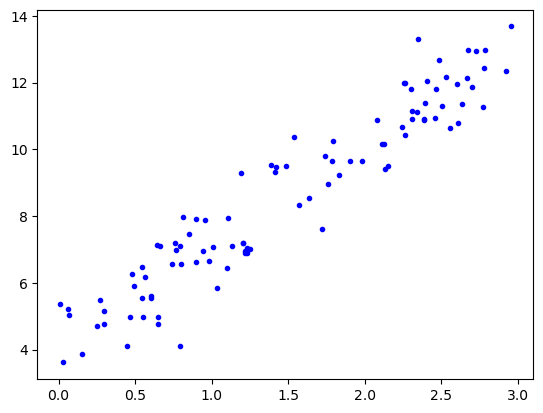

In [5]:
plt .plot(X, y, "b.")
plt.show()

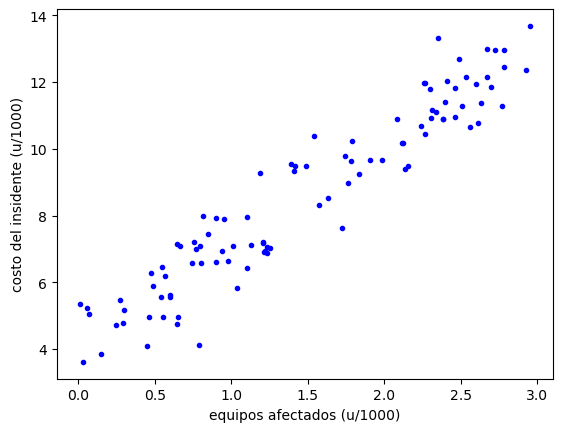

In [6]:
plt .plot(X, y, "b.")
plt.xlabel("equipos afectados (u/1000)")
plt.ylabel("costo del insidente (u/1000)")
plt.show()

### modificacion del dataset

In [7]:
import pandas as pd

In [8]:
data = {"no_equipo_afectados": X.flatten(), "costo": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,no_equipo_afectados,costo
0,0.663541,7.100882
1,0.272578,5.473187
2,0.008822,5.363306
3,0.955359,7.887920
4,2.300730,11.799425
5,2.155314,9.489770
6,2.609441,10.779305
7,0.850485,7.451080
8,0.547582,6.463138
9,0.069062,5.049113


In [9]:
# escalamiento del numero de equipos afectados 
df["no_equipo_afectados"] = df ["no_equipo_afectados"] * 1000
df["no_equipo_afectados"] = df ["no_equipo_afectados"]. astype("int")
#escalando
df["costo"] = df ["costo"] * 1000
df["costo"] = df ["costo"]. astype("int")
df.head(10)

,no_equipo_afectados,costo
0,663,7100
1,272,5473
2,8,5363
3,955,7887
4,2300,11799
5,2155,9489
6,2609,10779
7,850,7451
8,547,6463
9,69,5049


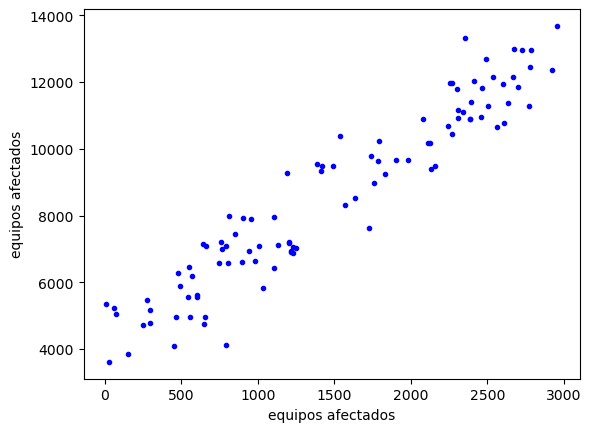

In [10]:
# representacion grafica del conjunto de datos
plt.plot(df["no_equipo_afectados"] , df["costo"], "b.")
plt.xlabel("equipos afectados")
plt.ylabel("equipos afectados")
plt.show()

# construccion del modelo 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# construccion del modelo y ajuste de la funcion de hipotesis 
lin_reg = LinearRegression()
lin_reg.fit(df["no_equipo_afectados"].values.reshape(-1,1), df["costo"].values)

LinearRegression()

In [13]:
# parsmetro theta 0 
lin_reg.intercept_

4164.526590942029

In [14]:
# parametro theta 1
lin_reg.coef_

array([2.97893341])

In [15]:
# predicccion para el valor minimo y maximo del conjunto de datos de entrenamiento 
X_min_max = np.array([[df["no_equipo_afectados"].min()], [df["no_equipo_afectados"].max]])
y_train_pred = lin_reg.predict(X_min_max)

TypeError: float() argument must be a string or a real number, not 'method'

In [ ]:
# rpresentacion grafica
plt.plot(X_min_man, y_train_pred, "g-")
plt.plot(df["no_equipo_afectados"], df["costo"], "b")
plt.xlabel("equipos afectados")
plt.ylabel("costo de incidente")
plt.title("regresion lineal, costo incidente de seguridad")
plt.show

### 5. prediccion de nuevos ejemplos

In [16]:
x_new = np.array([[1300]]) # 1300 equipos afectados 
# prediccion del costo del incidente
costo = lin_reg.predict(x_new)

print("el costo del incidente seria: $", int(costo[0]))

el costo del incidente seria: $ 8037
